# Anharmonic Potential Problem 
Solve the s-wave radial Schrodinger equation for a particle of mass m:

$ \frac{d^2y}{dr^2} = A(r)u(r) $ ,  $ A(r) = \frac{2m}{\hbar^2}[V(r) - E]$

For the anharmonic oscillator potential

$ V(r)=\frac{1}{2}kr^2+\frac{1}{3}br^3 $

for the ground state and first state energy  $ ( \mathrm{in\,MeV})$ of particle to an accuracy of three significant digits. Also, plot the corresponding wave functions.Choose $\mathrm{m=940\, MeV/c^2}$ 
, $ \mathrm{k=100\,MeV\, fm^{-2}}$, $ \mathrm{b=0, 10, 30\,MeV\, fm^{-3}}$ in  these units$ ,\mathrm{c \hbar =197.3\,MeV\, fm}$. The ground state energy I expected to lie between 90 and 110 MeV for all three cases.

For b=0
Energy values for Ground and first state are: [ 95.62451876 223.86968926]


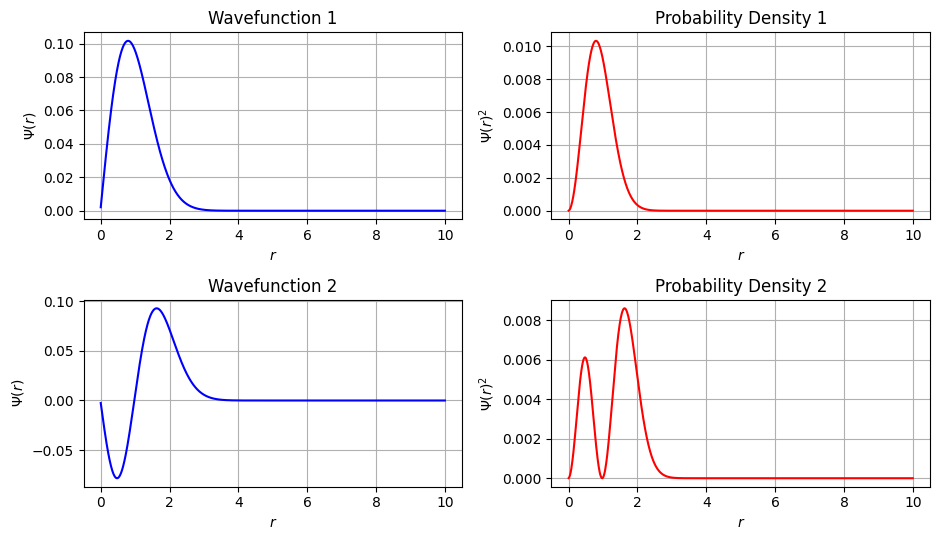

For b=10
Energy values for Ground and first state are: [ 99.27601065 236.50053529]


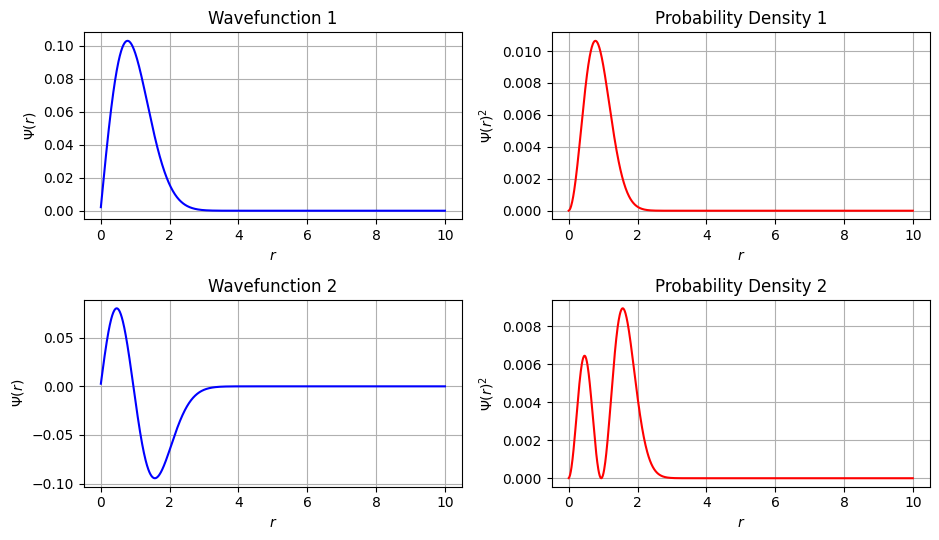

For b=30
Energy values for Ground and first state are: [105.80437266 258.2243101 ]


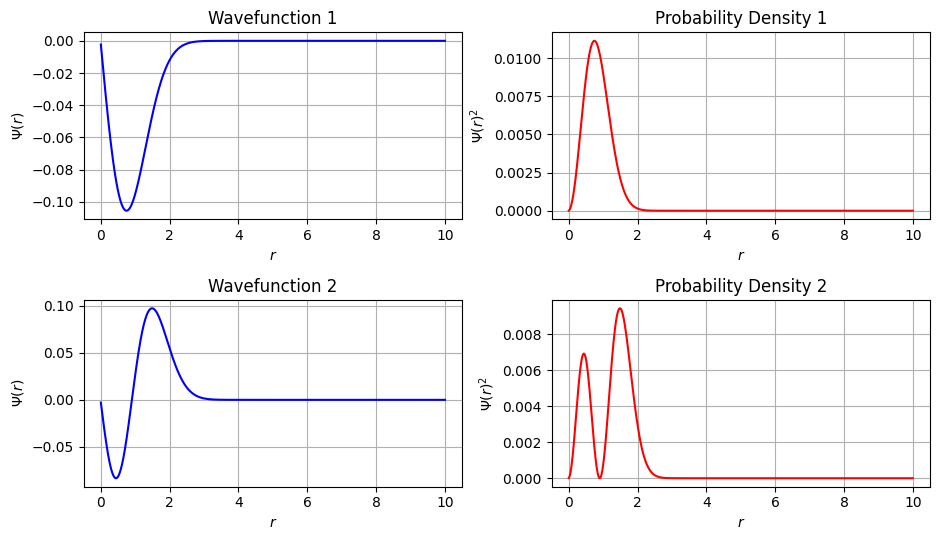

In [17]:
import numpy as np
import matplotlib.pyplot as plt
X=np.linspace(10e-100,10,1000)
r=X
h=X[2]-X[1]
m=940
k=100
hc=197.3
b_values=[0,10,30]
for b in b_values:
  print(f"For b={b}")
  H=np.zeros([1000,1000])
  for i in range(len(H)):
   try:
    H[i,i-1]=1
    H[i,i]=-2
    H[i,i+1]=1
   except:
    pass
  H=(1/h**2)*H
  H=((-hc**2)/(2*m))*H
  V=np.zeros([1000,1000])
  for i in range(1000):
     V[i,i]=(1/2)*k*r[i]**2+(1/3)*b*r[i]**3
  H=H+V
  eigenvalues,eigenvectors=np.linalg.eig(H)
  idx=eigenvalues.argsort()[:]
  eigenvalues=eigenvalues[idx]
  eigenvectors=eigenvectors[:,idx]
  print("Energy values for Ground and first state are:",eigenvalues[:2])
  fig,axs=plt.subplots(2,2,figsize=(9.5,5.5))
  for i in range(2):
   axs[i,0].plot(r,eigenvectors[:,i],'blue')
   axs[i,0].set_ylabel(r'$\Psi(r)$')
   axs[i,0].set_xlabel("$r$")
   axs[i,0].set_title(f"Wavefunction {i+1}")
   axs[i,0].grid(True)
   axs[i,1].plot(r,eigenvectors[:,i]**2,'r')
   axs[i,1].set_ylabel(r'$\Psi(r)^2$')
   axs[i,1].set_xlabel("$r$")
   axs[i,1].set_title(f"Probability Density {i+1}")
   axs[i,1].grid(True)
   plt.tight_layout()
  plt.show()